In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv('SalaryData_Train.csv')
df_train.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
5949,52,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,60,United-States,>50K
15997,18,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,25,United-States,<=50K
28985,29,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,7298,0,32,United-States,>50K
14443,45,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1977,35,United-States,>50K
7910,45,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [3]:
df_train.shape

(30161, 14)

In [4]:
df_test=pd.read_csv('SalaryData_Test.csv')
df_test.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
12075,37,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,40,United-States,<=50K
6515,20,Private,HS-grad,9,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,<=50K
2979,39,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
1834,22,Self-emp-inc,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,50,United-States,<=50K
14207,31,Private,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,50,United-States,<=50K


In [5]:
df_test.shape

(15060, 14)

## loading dataset

In [6]:
df=pd.concat([df_train,df_test])

In [7]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.shape

(45221, 14)

## EDA

In [9]:
df.info

<bound method DataFrame.info of        age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
15055   33            Private   Bachelors           13        Never-married   
15056   39            Private   Bachelors           13             Divorced   
15057   38            Private   Bachelors           13   Married-civ-spouse   
15058   44            Private   Bachelors           13             Divorced   
15059   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occu

#### removing unneccessary column

In [10]:
import seaborn as sns


In [11]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
df1=df.drop('educationno',axis=1)

In [13]:
df1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df1.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
df1.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

In [16]:
cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
for x in cols:
    print(x,"\n",df1[x].value_counts())

workclass 
  Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
education 
  HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
maritalstatus 
  Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
occupation 
  Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial  

### converting categorical features

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for x in cols:
    df1[x]=le.fit_transform(df1[x])
df1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0


In [19]:
df1.describe()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,0.247849
std,13.217981,0.958132,3.816992,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [20]:
df1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0


In [21]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [23]:
df1.shape

(45221, 13)

### checking duplicates and removing

In [24]:
df1.duplicated().sum()

5982

In [25]:
df1.drop_duplicates(inplace=True)
df1.shape

(39239, 13)

In [26]:
df1.Salary.value_counts()

0    29264
1     9975
Name: Salary, dtype: int64

## checking null values 

In [27]:
df1.isnull().any()

age              False
workclass        False
education        False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

age 



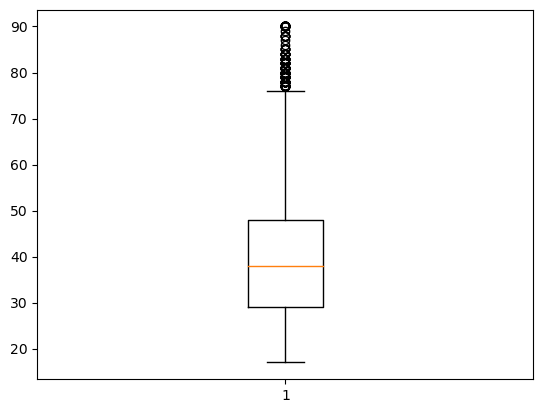

capitalgain 



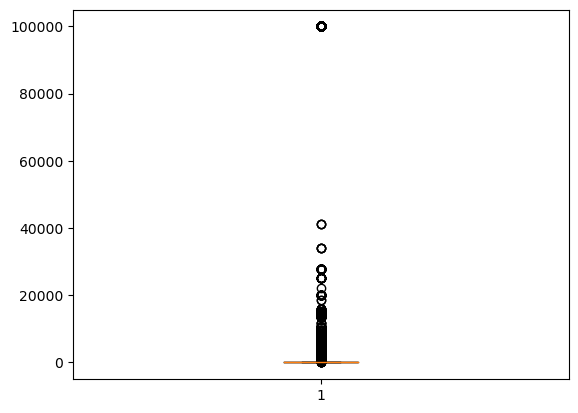

capitalloss 



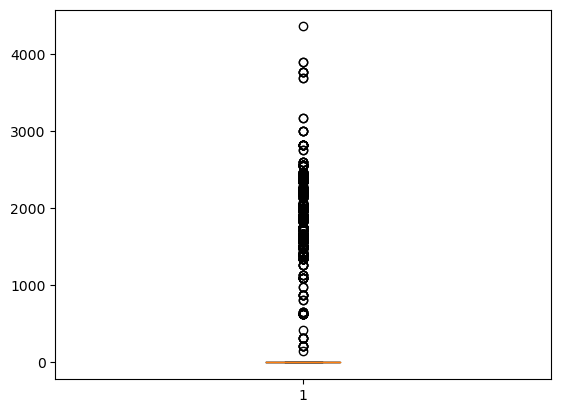

hoursperweek 



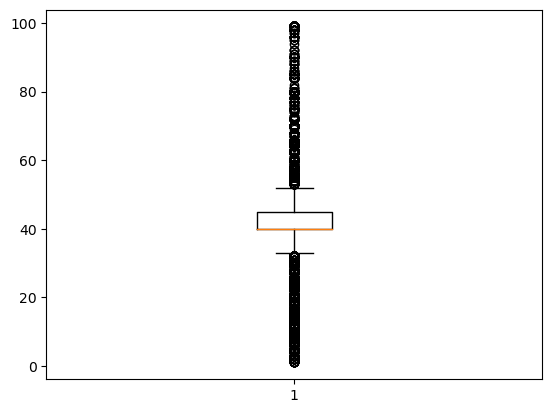

In [28]:
import matplotlib.pyplot as plt
int_cols=['age','capitalgain','capitalloss','hoursperweek']
for x in int_cols:
    print(x,"\n")
    plt.boxplot(df1[x])
    plt.show()

In [29]:
df1.shape

(39239, 13)

In [30]:
# finding IQR value
df2=df1.copy()
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age              19.0
workclass         0.0
education         3.0
maritalstatus     2.0
occupation        6.0
relationship      3.0
race              0.0
sex               1.0
capitalgain       0.0
capitalloss       0.0
hoursperweek      5.0
native            0.0
Salary            1.0
dtype: float64


In [31]:
df1.shape

(39239, 13)

In [32]:
df3=df1.copy()

In [33]:
# filtering
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3.shape

(11389, 13)

In [34]:
df3.isnull().any()

age              False
workclass        False
education        False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

## visualizations

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


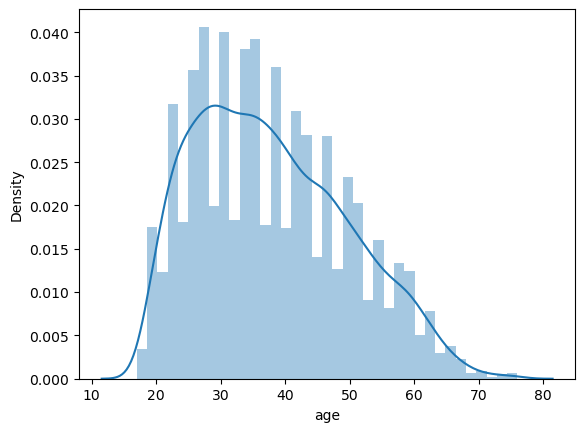

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])
C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


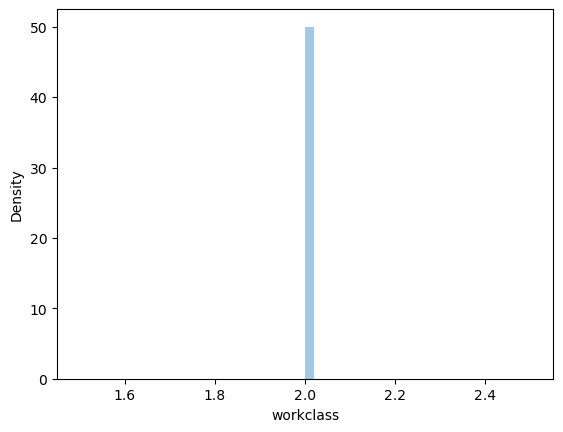

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


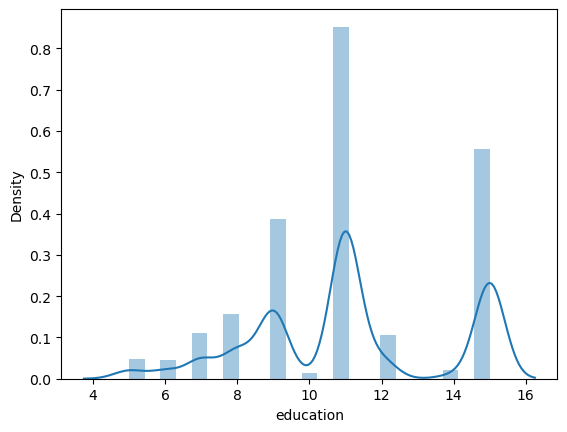

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


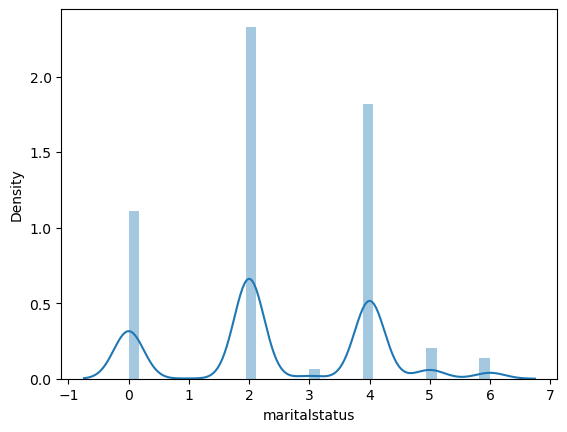

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


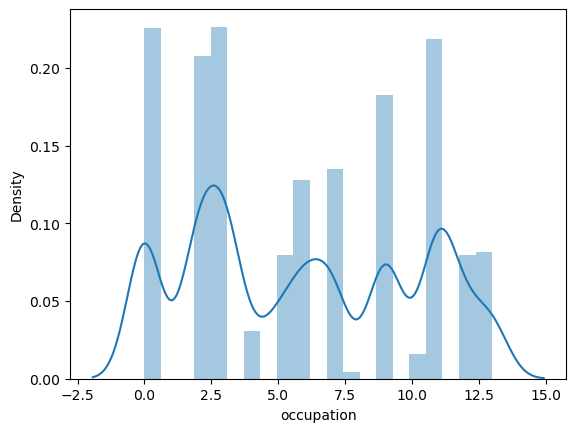

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


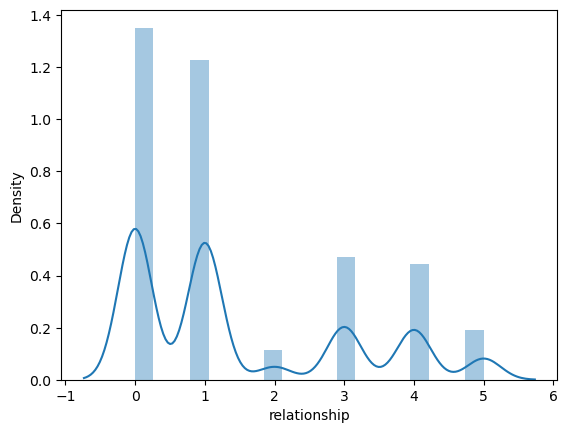

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])
C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


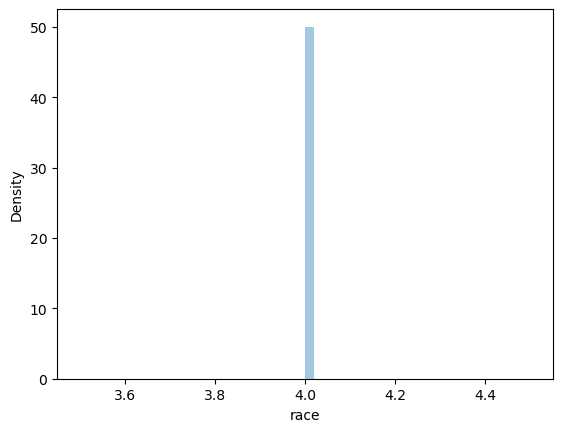

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


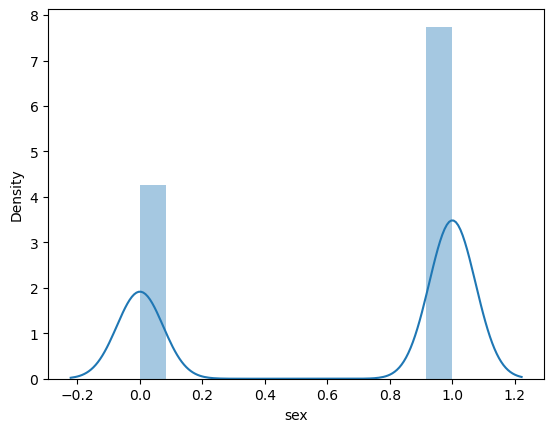

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])
C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


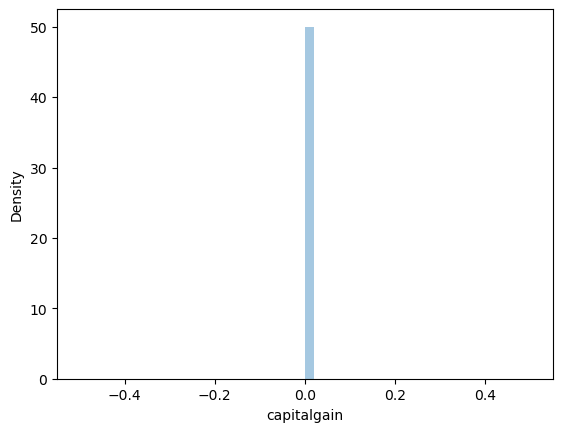

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])
C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


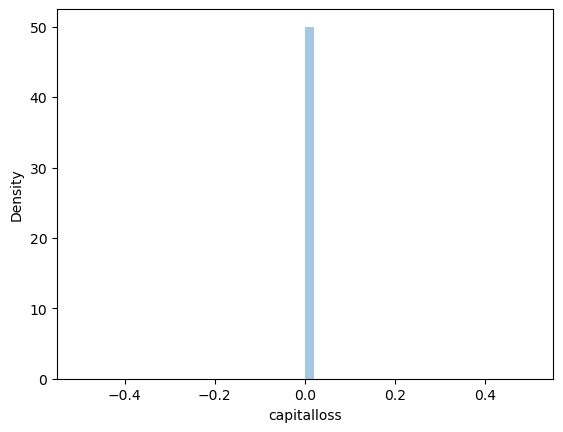

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


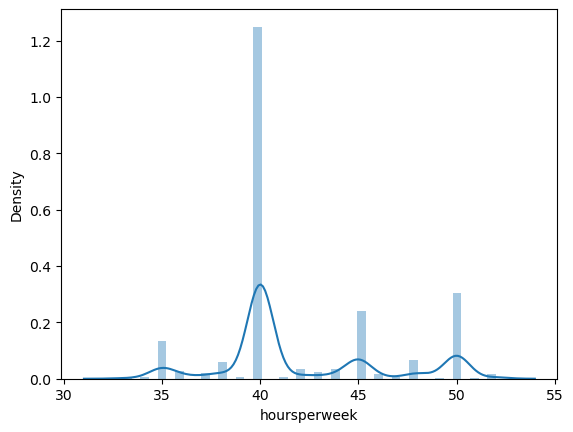

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])
C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


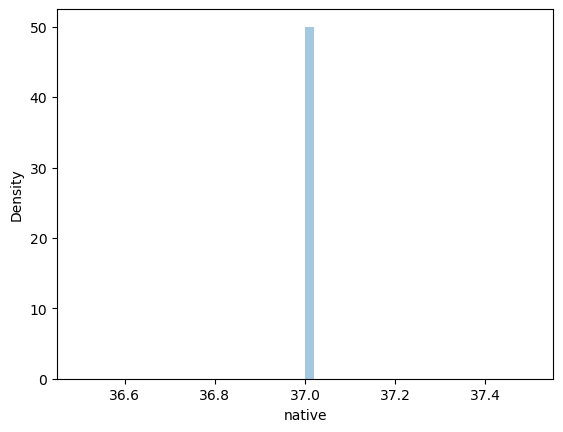

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_11100\1408468216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[x])


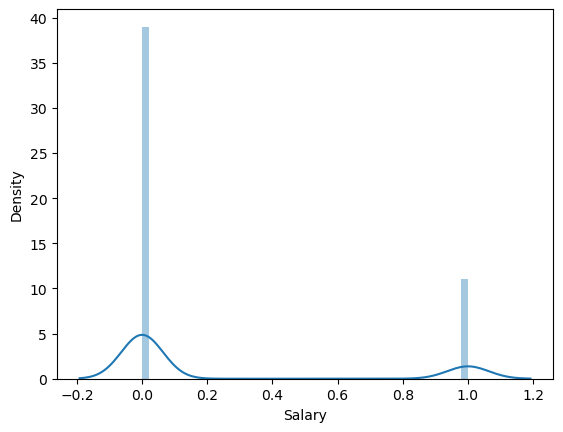

In [35]:
import seaborn as sns
for x in df3.columns:
    sns.distplot(df3[x])
    plt.show()

In [36]:
df3.Salary.value_counts()

0    8883
1    2506
Name: Salary, dtype: int64

In [37]:
X=df3.drop('Salary',axis=1)
X.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
2,38,2,11,0,5,1,4,1,0,0,40,37
5,37,2,12,2,3,5,4,0,0,0,40,37
16,32,2,11,4,6,4,4,1,0,0,40,37
23,59,2,11,0,12,4,4,0,0,0,40,37
25,19,2,11,4,2,3,4,1,0,0,40,37


In [38]:
y=df3['Salary']
y.head()

2     0
5     0
16    0
23    0
25    0
Name: Salary, dtype: int32

# handling imbalanced dataset

In [39]:
from imblearn.over_sampling import RandomOverSampler
nm=RandomOverSampler()

In [40]:
X_res,y_res=nm.fit_resample(X,y)

In [41]:
y_res.value_counts()

0    8883
1    8883
Name: Salary, dtype: int64

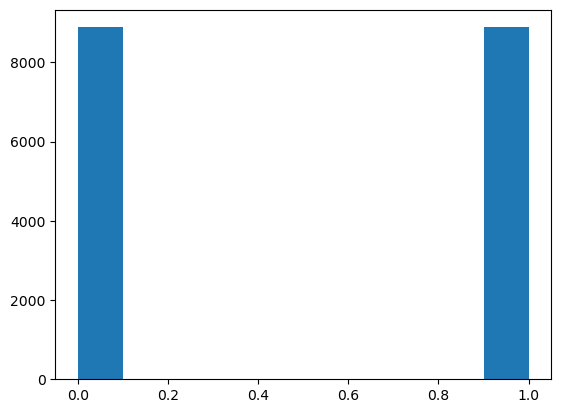

In [42]:
plt.hist(y_res)
plt.show()

## Standardizing data

## performing train test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test =train_test_split( X_res, y_res, test_size=0.20, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)

(14212, 12)
(3554, 12)


## scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## model building and checking accuracy

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model=GaussianNB()

In [50]:
model.fit(X_train,y_train)

GaussianNB()

In [51]:
model.score(X_test,y_test)## testing accuracy

0.7307259425998874

In [52]:
y_pred=model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1771
           1       0.72      0.75      0.74      1783

    accuracy                           0.73      3554
   macro avg       0.73      0.73      0.73      3554
weighted avg       0.73      0.73      0.73      3554



In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1261,  510],
       [ 447, 1336]], dtype=int64)

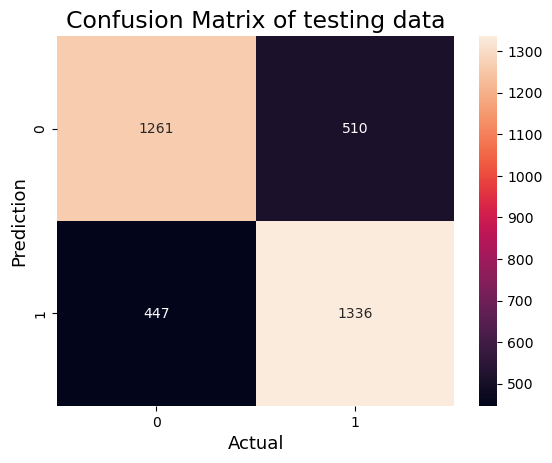

In [56]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of testing data',fontsize=17)
plt.show()

In [57]:
y_pr=model.predict(X_train)

In [58]:
cm_ac=confusion_matrix(y_train,y_pr)

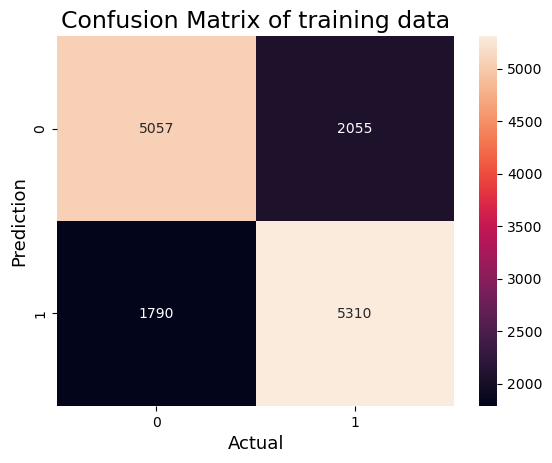

In [59]:
sns.heatmap(cm_ac,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of training data',fontsize=17)
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pr)
## training accuracy

0.7294539825499577